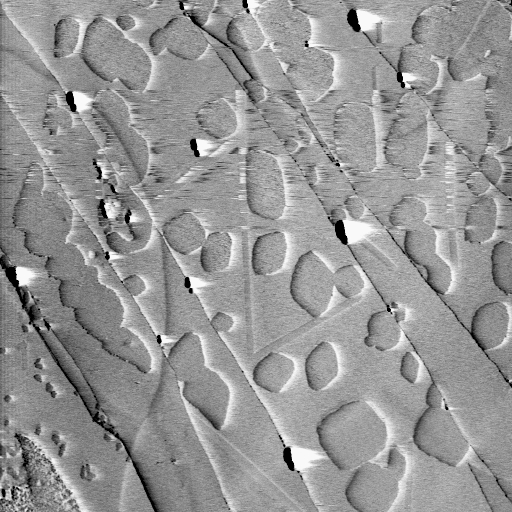

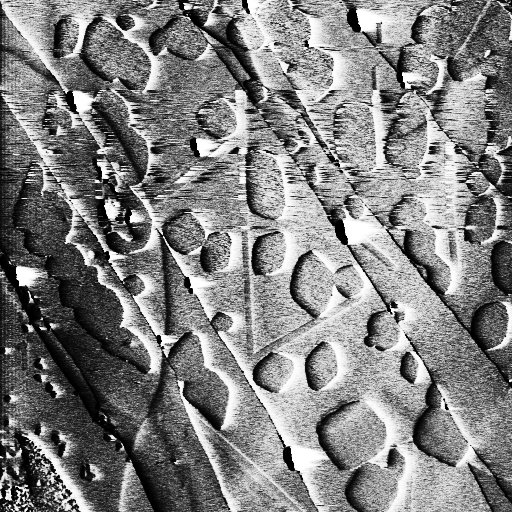

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = '/content/1_amplitude.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display original and equalized images
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

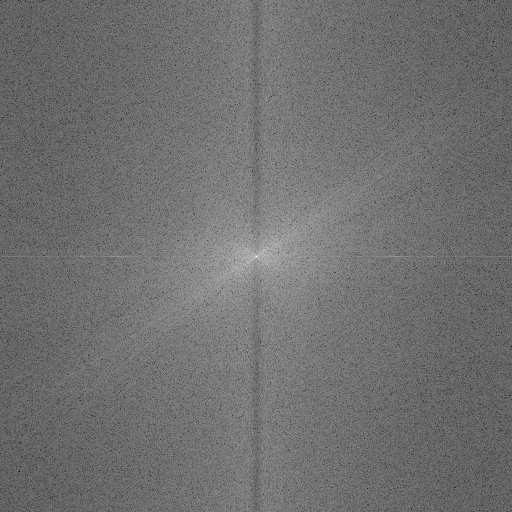

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# now we will be loading the image and converting it to grayscale
image = cv2.imread(r"/content/1_amplitude.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
cv2_imshow(magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

amplitude_rgb = imread('/content/1_amplitude.jpg')
amplitude_gray = rgb2gray(amplitude_rgb)
plt.imshow(amplitude_gray, cmap='gray')
plt.title('Amplitude image in Grayscale');

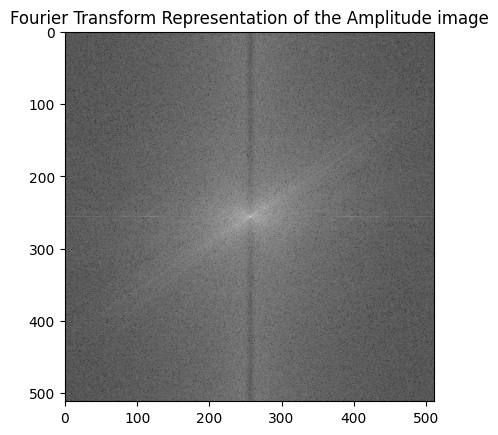

In [ ]:
amplitude_fft = np.fft.fftshift(np.fft.fft2(amplitude_gray))
plt.imshow(np.log(abs(amplitude_fft)), cmap='gray')
plt.title('Fourier Transform Representation of the Amplitude image');

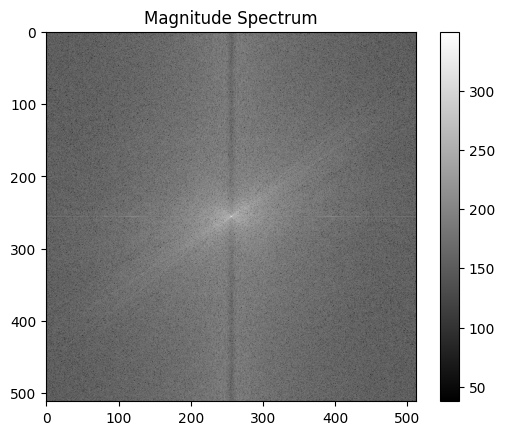

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/1_amplitude.jpg', 0)  # Read as grayscale

# Compute the Fourier Transform
f_img = np.fft.fft2(img)

# Shift the zero-frequency component to the center
f_img_shifted = np.fft.fftshift(f_img)

# Compute the Magnitude Spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_img_shifted))

# Display the Magnitude Spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

In [ ]:
cutoff_frequency = 180  # Adjust this value according to your image and noise characteristics
rows, cols = img.shape
center_row, center_col = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.uint8)
mask[center_row - cutoff_frequency:center_row + cutoff_frequency, center_col - cutoff_frequency:center_col + cutoff_frequency] = 1


In [ ]:
f_img_filtered = f_img_shifted * mask

In [ ]:
f_img_filtered_unshifted = np.fft.ifftshift(f_img_filtered)
img_filtered = np.fft.ifft2(f_img_filtered_unshifted)
img_filtered = np.abs(img_filtered)
img_filtered = np.uint8(img_filtered)

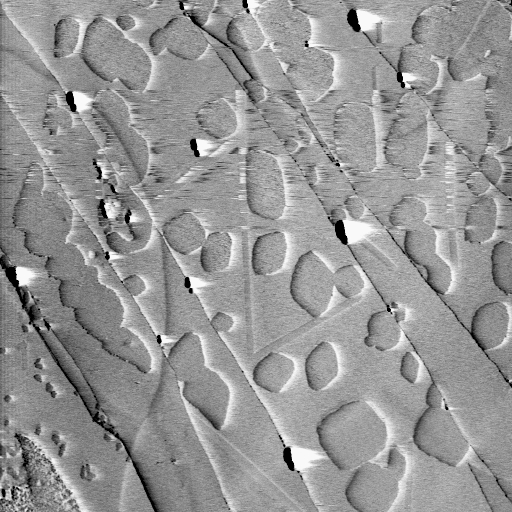

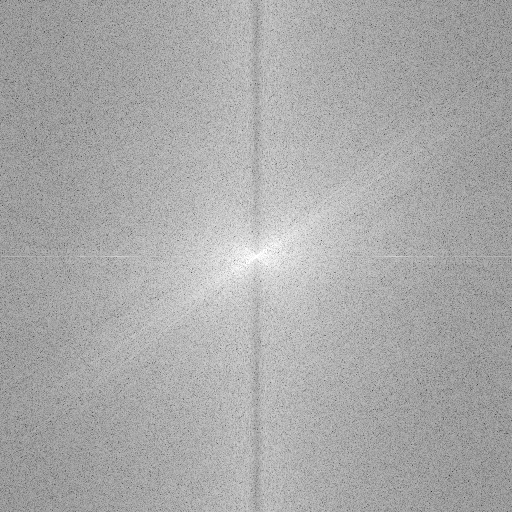

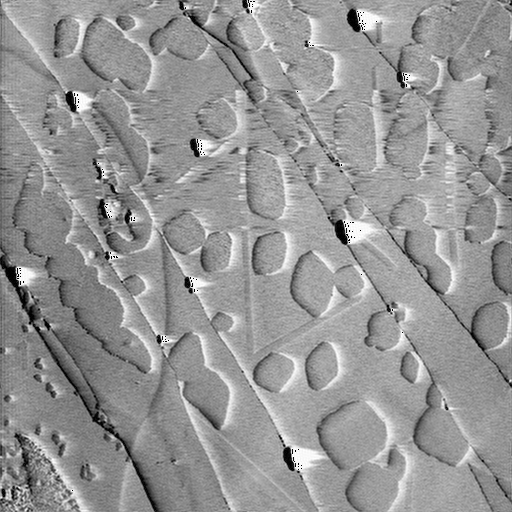

In [ ]:
from google.colab.patches import cv2_imshow

# Display the original image
cv2_imshow(img)

# Display the magnitude spectrum
cv2_imshow(magnitude_spectrum)

# Display the filtered image
cv2_imshow(img_filtered)


# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

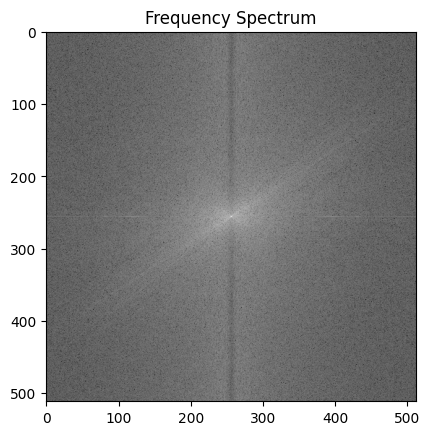

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Load your image (replace with your image path)
image = plt.imread('/content/1_amplitude.jpg')

# Convert to grayscale if needed
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Fourier Transform
image_fft = np.fft.fft2(image)
spectrum = np.log(abs(np.fft.fftshift(image_fft)))

# Visualize the spectrum (adjust as needed)
plt.imshow(spectrum, cmap='gray')
plt.title('Frequency Spectrum')
plt.show()



In [ ]:
# Create a low-pass filter (modify radius as needed)
radius = 0.1
y, x = np.ogrid[-image.shape[0]//2: image.shape[0]//2, -image.shape[1]//2: image.shape[1]//2]
filter_mask = x*x + y*y <= radius*radius

# Apply filter
filtered_fft = image_fft * filter_mask

# Inverse Fourier Transform
denoised_image = np.fft.ifft2(filtered_fft)
denoised_image = np.real(denoised_image)

# Save image (adjust as needed)
plt.imsave('denoised_image.jpg', denoised_image, cmap='gray')